### Importando Bibliotecas

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from babel.numbers import format_currency # pip install babel

### Config. gerais de apresentação dados


In [23]:
# Definir a opção para não usar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

### Leitura dados

In [91]:
bd = pd.read_csv("data/raw/statusinvest-busca-avancada.csv",on_bad_lines='skip',sep=";", thousands='.', decimal=",")
bd

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.70,NaN,-10.85,2.96,1.04,30.83,-1.55,-22.50,-157.79,...,0.35,0.63,0.43,0.13,NaN,5585911.66,7.67,-2.09,-0.02,2685246923.20
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,25439770.20
4,AERI3,1.63,NaN,-10.75,1.45,0.38,13.11,9.22,-4.20,4.90,...,0.26,0.74,0.84,NaN,NaN,6900826.19,1.13,-0.15,0.03,1248927933.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,WIZC3,5.99,7.43,8.47,2.44,0.42,57.99,36.42,11.37,2.64,...,0.17,0.59,0.43,12.37,-6.64,3582393.31,2.45,0.71,-0.28,957844619.18
597,WLMM3,19.60,5.83,5.82,1.11,0.82,13.10,7.72,5.71,4.31,...,0.74,0.26,2.47,32.16,NaN,10010.00,17.72,3.37,0.25,787148297.00
598,WLMM4,23.30,5.39,6.92,1.31,0.98,13.10,7.72,5.71,5.12,...,0.74,0.26,2.47,32.16,NaN,34278.93,17.72,3.37,0.29,787148297.00
599,YDUQ3,13.12,NaN,278.94,1.31,0.42,57.39,15.09,0.31,5.73,...,0.32,0.67,0.49,6.20,-49.08,50354900.59,10.03,0.05,-3.02,4055245725.12


In [92]:
# Renomear Colunas, removendo o caractere especial "/" e espacos entre nomes
bd.rename(columns=lambda x: x.replace('/', ''), inplace=True)
bd.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
bd.head(2)

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
0,AALR3,22.70,NaN,-10.85,2.96,1.04,30.83,-1.55,-22.50,-157.79,...,0.35,0.63,0.43,0.13,NaN,5585911.66,7.67,-2.09,-0.02,2685246923.20
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76


In [68]:
# Item 5.
# Preencher os espaços vazios com 0
bd.fillna(0, inplace=True)
bd

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
0,AALR3,22.70,0.00,-10.85,2.96,1.04,30.83,-1.55,-22.50,-157.79,...,0.35,0.63,0.43,0.13,0.00,5585911.66,7.67,-2.09,-0.02,2685246923.20
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.00,-1.21,-0.38,-0.58,25439770.20
4,AERI3,1.63,0.00,-10.75,1.45,0.38,13.11,9.22,-4.20,4.90,...,0.26,0.74,0.84,0.00,0.00,6900826.19,1.13,-0.15,0.03,1248927933.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,WIZC3,5.99,7.43,8.47,2.44,0.42,57.99,36.42,11.37,2.64,...,0.17,0.59,0.43,12.37,-6.64,3582393.31,2.45,0.71,-0.28,957844619.18
597,WLMM3,19.60,5.83,5.82,1.11,0.82,13.10,7.72,5.71,4.31,...,0.74,0.26,2.47,32.16,0.00,10010.00,17.72,3.37,0.25,787148297.00
598,WLMM4,23.30,5.39,6.92,1.31,0.98,13.10,7.72,5.71,5.12,...,0.74,0.26,2.47,32.16,0.00,34278.93,17.72,3.37,0.29,787148297.00
599,YDUQ3,13.12,0.00,278.94,1.31,0.42,57.39,15.09,0.31,5.73,...,0.32,0.67,0.49,6.20,-49.08,50354900.59,10.03,0.05,-3.02,4055245725.12


In [69]:
# Item 6.
# Filtrando por preço <1000 e > 0
bd_filter = bd.query('PRECO >0 and PRECO < 1000')
bd_filter

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
0,AALR3,22.70,0.00,-10.85,2.96,1.04,30.83,-1.55,-22.50,-157.79,...,0.35,0.63,0.43,0.13,0.00,5585911.66,7.67,-2.09,-0.02,2685246923.20
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.00,-1.21,-0.38,-0.58,25439770.20
4,AERI3,1.63,0.00,-10.75,1.45,0.38,13.11,9.22,-4.20,4.90,...,0.26,0.74,0.84,0.00,0.00,6900826.19,1.13,-0.15,0.03,1248927933.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,WIZC3,5.99,7.43,8.47,2.44,0.42,57.99,36.42,11.37,2.64,...,0.17,0.59,0.43,12.37,-6.64,3582393.31,2.45,0.71,-0.28,957844619.18
597,WLMM3,19.60,5.83,5.82,1.11,0.82,13.10,7.72,5.71,4.31,...,0.74,0.26,2.47,32.16,0.00,10010.00,17.72,3.37,0.25,787148297.00
598,WLMM4,23.30,5.39,6.92,1.31,0.98,13.10,7.72,5.71,5.12,...,0.74,0.26,2.47,32.16,0.00,34278.93,17.72,3.37,0.29,787148297.00
599,YDUQ3,13.12,0.00,278.94,1.31,0.42,57.39,15.09,0.31,5.73,...,0.32,0.67,0.49,6.20,-49.08,50354900.59,10.03,0.05,-3.02,4055245725.12


In [94]:
# Item 7.
# Salvar arquivo em formato xlsx na pasta especifica
bd_filter.to_excel('data/base_tratada.xlsx')

In [95]:
# Item 9.
bd_filter.head()

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
0,AALR3,22.70,0.00,-10.85,2.96,1.04,30.83,-1.55,-22.50,-157.79,...,0.35,0.63,0.43,0.13,0.00,5585911.66,7.67,-2.09,-0.02,2685246923.20
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.00,-1.21,-0.38,-0.58,25439770.20
4,AERI3,1.63,0.00,-10.75,1.45,0.38,13.11,9.22,-4.20,4.90,...,0.26,0.74,0.84,0.00,0.00,6900826.19,1.13,-0.15,0.03,1248927933.28


In [96]:
# Item 10.
bd_filter.sort_values('PRECO',ascending=False).head(1)

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
393,MSRO3,702.50,0.00,1688.87,262.32,74.39,52.18,36.59,8.57,395.70,...,0.28,0.72,0.51,8.72,95.18,0.00,2.68,0.42,84.62,18271898550.00


In [71]:
# Item 11. (10 Maiores precos de ativos)
bd_filter.sort_values('PRECO',ascending=False).head(10)

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
393,MSRO3,702.50,0.00,1688.87,262.32,74.39,52.18,36.59,8.57,395.70,...,0.28,0.72,0.51,8.72,95.18,0.00,2.68,0.42,84.62,18271898550.00
219,EEEL4,410.00,33.87,4.54,2.13,0.78,59.51,80.32,66.44,3.76,...,0.37,0.63,0.26,6.73,17.15,100734.67,192.68,90.25,0.01,2864486063.75
380,MOAR3,379.00,1.29,17.51,4.41,1.98,0.00,0.00,0.00,14.29,...,0.45,0.55,0.00,0.00,13.44,543858.24,85.94,21.65,-0.37,4643212759.00
70,BMKS3,330.00,17.51,5.36,0.73,0.64,26.12,56.71,145.00,13.69,...,0.88,0.12,0.08,2.51,28.40,8726.73,451.46,61.61,0.03,150067500.00
218,EEEL3,294.77,42.83,3.27,1.53,0.56,59.51,80.32,66.44,2.70,...,0.37,0.63,0.26,6.73,17.15,0.00,192.68,90.25,0.01,2864486063.75
25,APTI3,197.64,0.00,-0.14,0.02,0.01,94.24,-93.35,-57.25,-0.09,...,0.42,0.58,0.09,4.07,0.00,0.00,10896.15,-1375.05,0.00,44442750.00
80,BPAR3,182.07,3.37,7.28,1.02,0.11,55.65,14.23,8.39,4.30,...,0.11,0.89,0.19,4.66,0.56,0.00,178.47,25.00,0.30,1733606633.43
145,CGAS5,127.80,10.25,30.82,-95.44,1.30,20.22,16.12,3.10,5.93,...,-0.01,1.01,1.36,25.75,-3.01,97202.07,-1.34,4.15,-0.42,14578589775.87
138,CEPE3,125.26,0.43,81.27,5.86,0.71,19.73,12.27,1.41,9.36,...,0.12,0.88,0.62,8.38,15.32,0.00,21.39,1.54,-1.20,8638460288.58
311,IGBR3,119.30,0.00,0.38,-0.23,0.70,100.00,6032.01,5379.32,0.34,...,-3.06,4.06,0.03,-7.98,0.00,348396.73,-520.56,312.87,0.00,149184172.80


In [97]:
# Item 11. (10 Menores precos de ativos)
bd_filter.sort_values('PRECO',ascending=True).head(10)

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
583,VIVR3,0.35,0.00,-2.64,2.47,0.24,29.41,-49.76,-24.54,-1.30,...,0.10,0.90,0.36,83.05,0.00,2807000.44,0.14,-0.13,0.05,82174572.20
82,BPHA3,0.62,0.00,0.06,-0.24,0.99,98.02,1029.99,13896.67,0.80,...,-4.15,5.15,0.12,-68.85,0.00,0.00,-2.58,10.40,0.00,70110298.74
20,AMAR3,0.65,0.00,-0.48,0.61,0.08,38.66,-8.56,-16.96,-0.95,...,0.13,0.87,0.94,-0.89,0.00,6406251.44,1.07,-1.35,0.00,222847892.80
318,INEP4,0.78,0.00,-0.39,-0.08,0.11,-75.75,-1007.89,-3979.96,-1.52,...,-1.28,2.28,0.01,-23.07,0.00,313076.28,-9.21,-2.02,0.00,171947327.16
474,RCSL4,0.79,0.00,-15.22,204.60,3.06,11.58,7.76,-17.89,35.11,...,0.01,0.99,1.12,362.53,0.00,1267317.97,0.00,-0.05,-0.02,285574799.76
540,TCNO4,0.85,0.00,-5.33,-5.95,0.02,0.00,0.00,0.00,-4.82,...,0.00,1.00,0.00,0.00,0.00,12175.76,-0.14,-0.16,-0.20,6451072.50
117,CASH3,0.86,0.00,-12.28,0.95,0.60,-41.31,-41.31,-16.08,-4.78,...,0.62,0.37,0.30,70.01,0.00,15802567.38,0.90,-0.07,-0.50,744055180.98
209,DOTZ3,0.88,0.00,-1.24,-0.63,0.32,87.88,-76.62,-69.30,-1.12,...,-0.51,1.51,0.38,3.79,0.00,72336.47,-1.40,-0.71,-0.06,116220149.76
561,TRAD3,0.93,0.00,-2.28,0.52,0.46,40.71,-132.55,-162.03,-2.79,...,0.89,0.11,0.13,0.00,0.00,1033479.66,1.78,-0.41,0.00,260536838.34
512,SLED4,0.99,0.00,0.09,-0.03,0.10,45.54,210.83,124.35,0.05,...,-3.69,4.69,0.87,-45.03,0.00,43829.47,-37.75,11.06,0.00,13697249.21


In [108]:
# Item 12.
print(format_currency(bd_filter.LIQUIDEZMEDIADIARIA.sum(), 'BRL', locale='pt_BR'))
print(format_currency(bd_filter.LIQUIDEZMEDIADIARIA.mean(), 'BRL', locale='pt_BR'))

R$ 21.242.037.832,72
R$ 37.730.084,96


In [73]:
# Item 13.
bd_filter.query("PL > 0")

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
5,AESB3,12.38,0.87,58.88,1.69,0.37,33.16,25.99,4.28,9.70,...,0.22,0.72,0.15,0.00,0.00,36662392.28,7.31,0.21,0.00,7451860110.18
6,AFLT3,9.01,2.91,14.49,2.10,1.84,59.73,49.97,48.96,14.20,...,0.88,0.12,0.26,24.96,25.66,6820.47,4.30,0.62,-0.23,568393147.00
7,AGRO3,23.14,14.00,41.61,1.16,0.71,14.46,5.37,4.93,38.14,...,0.61,0.39,0.35,59.78,15.83,10221758.91,19.91,0.56,-0.45,2369003965.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,WHRL4,4.41,4.67,18.28,2.89,0.77,16.17,6.76,3.38,9.15,...,0.27,0.73,1.25,12.32,-3.61,26949.31,1.52,0.24,-0.31,6658147313.22
596,WIZC3,5.99,7.43,8.47,2.44,0.42,57.99,36.42,11.37,2.64,...,0.17,0.59,0.43,12.37,-6.64,3582393.31,2.45,0.71,-0.28,957844619.18
597,WLMM3,19.60,5.83,5.82,1.11,0.82,13.10,7.72,5.71,4.31,...,0.74,0.26,2.47,32.16,0.00,10010.00,17.72,3.37,0.25,787148297.00
598,WLMM4,23.30,5.39,6.92,1.31,0.98,13.10,7.72,5.71,5.12,...,0.74,0.26,2.47,32.16,0.00,34278.93,17.72,3.37,0.29,787148297.00


In [74]:
# Item 14.
bd_filter.query("DY > 0")

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
2,ABEV3,14.58,5.23,15.58,2.70,1.70,49.71,22.46,18.03,12.50,...,0.63,0.36,0.60,10.72,15.19,370078910.03,5.40,0.94,1.63,229690889280.72
5,AESB3,12.38,0.87,58.88,1.69,0.37,33.16,25.99,4.28,9.70,...,0.22,0.72,0.15,0.00,0.00,36662392.28,7.31,0.21,0.00,7451860110.18
6,AFLT3,9.01,2.91,14.49,2.10,1.84,59.73,49.97,48.96,14.20,...,0.88,0.12,0.26,24.96,25.66,6820.47,4.30,0.62,-0.23,568393147.00
7,AGRO3,23.14,14.00,41.61,1.16,0.71,14.46,5.37,4.93,38.14,...,0.61,0.39,0.35,59.78,15.83,10221758.91,19.91,0.56,-0.45,2369003965.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,WHRL3,4.44,4.21,18.40,2.91,0.78,16.17,6.76,3.38,9.21,...,0.27,0.73,1.25,12.32,-3.61,7725.44,1.52,0.24,-0.31,6658147313.22
595,WHRL4,4.41,4.67,18.28,2.89,0.77,16.17,6.76,3.38,9.15,...,0.27,0.73,1.25,12.32,-3.61,26949.31,1.52,0.24,-0.31,6658147313.22
596,WIZC3,5.99,7.43,8.47,2.44,0.42,57.99,36.42,11.37,2.64,...,0.17,0.59,0.43,12.37,-6.64,3582393.31,2.45,0.71,-0.28,957844619.18
597,WLMM3,19.60,5.83,5.82,1.11,0.82,13.10,7.72,5.71,4.31,...,0.74,0.26,2.47,32.16,0.00,10010.00,17.72,3.37,0.25,787148297.00


In [75]:
# Item 15.
# Listar acoes do tipo PN
bd_filter_pn = bd_filter[bd_filter['TICKER'].str.endswith('4')]
bd_filter_pn

,TICKER,PRECO,DY,PL,PVP,PATIVOS,MARGEMBRUTA,MARGEMEBIT,MARG.LIQUIDA,PEBIT,...,PATRIMONIOATIVOS,PASSIVOSATIVOS,GIROATIVOS,CAGRRECEITAS5ANOS,CAGRLUCROS5ANOS,LIQUIDEZMEDIADIARIA,VPA,LPA,PEGRatio,VALORDEMERCADO
1,ABCB4,17.82,6.08,4.93,0.76,0.08,32.56,26.15,18.94,3.57,...,0.10,0.90,0.08,18.70,13.83,13835624.44,23.46,3.61,0.17,4028925902.76
14,ALPA4,8.96,0.00,-55.13,1.11,0.75,45.10,-3.22,-2.67,-45.73,...,0.68,0.32,0.51,2.36,0.00,79324754.91,8.07,-0.16,0.46,6133817936.68
19,ALUP4,9.65,5.39,12.28,1.23,0.31,79.84,71.68,20.19,3.46,...,0.25,0.62,0.12,20.04,16.77,372227.06,7.86,0.79,-0.30,8716095044.80
36,AZEV4,1.28,0.00,-0.88,1.28,0.17,5.39,-27.08,-23.84,-0.78,...,0.13,0.87,0.81,43.23,0.00,484584.44,1.00,-1.45,0.00,101975765.04
37,AZUL4,14.08,0.00,-4.32,-0.90,1.02,18.55,10.14,-23.94,10.19,...,-1.13,2.13,0.99,15.41,0.00,175198130.19,-15.60,-3.26,0.01,4899975291.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,TRPL4,24.45,4.35,6.53,0.95,0.48,60.18,65.79,43.59,4.33,...,0.50,0.49,0.17,15.07,12.57,47547995.94,25.68,3.75,-0.38,17463869875.80
568,TXRX4,2.90,0.00,-561.45,-0.04,0.05,29.51,14.06,-0.01,0.41,...,-1.38,2.38,0.88,20.12,0.00,7968.72,-78.32,-0.01,5.62,20800212.30
585,VIVT4,45.34,0.00,18.12,1.10,0.62,42.96,13.84,8.43,11.03,...,0.56,0.44,0.41,2.14,-2.01,0.00,41.34,2.50,-0.58,69337044548.08
595,WHRL4,4.41,4.67,18.28,2.89,0.77,16.17,6.76,3.38,9.15,...,0.27,0.73,1.25,12.32,-3.61,26949.31,1.52,0.24,-0.31,6658147313.22


In [109]:
# Item 16.
# Salvar em arquivo txt 
path = r'output/AcoesPN.txt'

with open(path, 'a') as f:
    df_string = bd_filter_pn.to_string(header=False, index=False)
    f.write(df_string)

In [110]:
# Item 17.
# Listar as 10 açoes com maior liquidez media diaria (Geral)

bd_filter[['TICKER','LIQUIDEZMEDIADIARIA']].sort_values('LIQUIDEZMEDIADIARIA',ascending=False).head(10)

,TICKER,LIQUIDEZMEDIADIARIA
577,VALE3,1853846159.69
437,PETR4,1755433639.66
326,ITUB4,762033672.97
46,BBDC4,734479542.72
44,BBAS3,572181535.59
38,B3SA3,489664723.97
225,ELET3,448524936.91
436,PETR3,446458307.31
455,PRIO3,436173103.84
374,MGLU3,434881052.16


In [111]:
# Item 17.
# Listar as 10 açoes com maior liquidez media diaria  (PN)

bd_filter_pn[['TICKER','LIQUIDEZMEDIADIARIA']].sort_values('LIQUIDEZMEDIADIARIA',ascending=False).head(10)

,TICKER,LIQUIDEZMEDIADIARIA
437,PETR4,1755433639.66
326,ITUB4,762033672.97
46,BBDC4,734479542.72
282,GGBR4,247676349.41
324,ITSA4,177956732.88
37,AZUL4,175198130.19
153,CMIG4,133605854.94
287,GOAU4,98048713.53
84,BRAP4,83316179.63
288,GOLL4,82499195.41


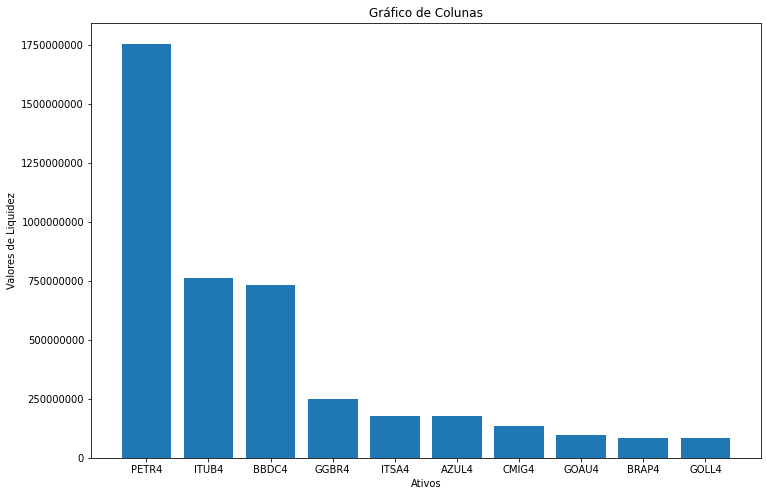

In [117]:
# Item 18.
bd_grafico = bd_filter_pn[['TICKER','LIQUIDEZMEDIADIARIA']].sort_values('LIQUIDEZMEDIADIARIA',ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(bd_grafico.TICKER, bd_grafico.LIQUIDEZMEDIADIARIA)
plt.xlabel('Ativos')
plt.ylabel('Valores de Liquidez')
plt.title('Gráfico de Colunas')
plt.ticklabel_format(axis='y', style='plain')
# Salvar figura
plt.savefig('output/grafico_ticket_maiores_liquidez.png', format='png')
plt.show()

### Perguntas

In [138]:
# Pergunta 1. 
# funcao maior valor lista
max(list(bd.PRECO))

11091.73

In [139]:
# Pergunta 2. 
# funcao posicao de valor em lista
list(bd.PRECO).index(11091.73)

111

In [141]:
# Pergunta 3. 
# funcao organiza lista forma crescente
sorted(list(bd.PRECO))

# usando sort_values()
bd.PRECO.sort_values()


405       0.00
464       0.00
460       0.00
459       0.00
441       0.00
        ...   
219     410.00
393     702.50
26     3500.00
47     3936.42
111   11091.73
Name: PRECO, Length: 601, dtype: float64

In [142]:
# Pergunta 4. 
# ultimos 10 valores em uma lista
list(bd.PRECO)[-10:]

[16.87, 40.13, 1.11, 4.44, 4.41, 5.99, 19.6, 23.3, 13.12, 3.8]

In [143]:
# Pergunta 5. 
# organiza lista em forma decrescente
bd.PRECO.sort_values(ascending=False)

111   11091.73
47     3936.42
26     3500.00
393     702.50
219     410.00
        ...   
156       0.00
155       0.00
121       0.00
104       0.00
407       0.00
Name: PRECO, Length: 601, dtype: float64

In [ ]:
# Pergunta 6. = Item 12.
# Pergunta 7. = Item 17.
# Pergunta 8. = "Units".
# Pergunta 9. = if x > 0 e if x != 0 
# Pergunta 10. = Item 15.
# Pergunta 11. = to_string() 
# Pergunta 12. = open()
# Pergunta 13. = Item 16. 
# Pergunta 14. = Item 18.
# Pergunta 15. = Item 13.